Fetching data for TCS.BSE...
Fetching data for HDFCBANK.BSE...
Fetching data for INFY.BSE...
Fetching data for ICICIBANK.BSE...
Fetching data for SBIN.BSE...

Most Recent Closing Prices:
              TCS.BSE  HDFCBANK.BSE  INFY.BSE  ICICIBANK.BSE  SBIN.BSE
2025-03-18  3552.6499       1733.15   1608.80        1309.60    737.05
2025-03-19  3497.1499       1743.85   1586.55        1312.70    745.05
2025-03-20  3562.8000       1767.30   1614.15        1321.35    749.20
2025-03-21  3579.3999       1769.85   1592.60        1341.45    753.00
2025-03-24  3631.5500       1801.15   1592.20        1358.20    781.40


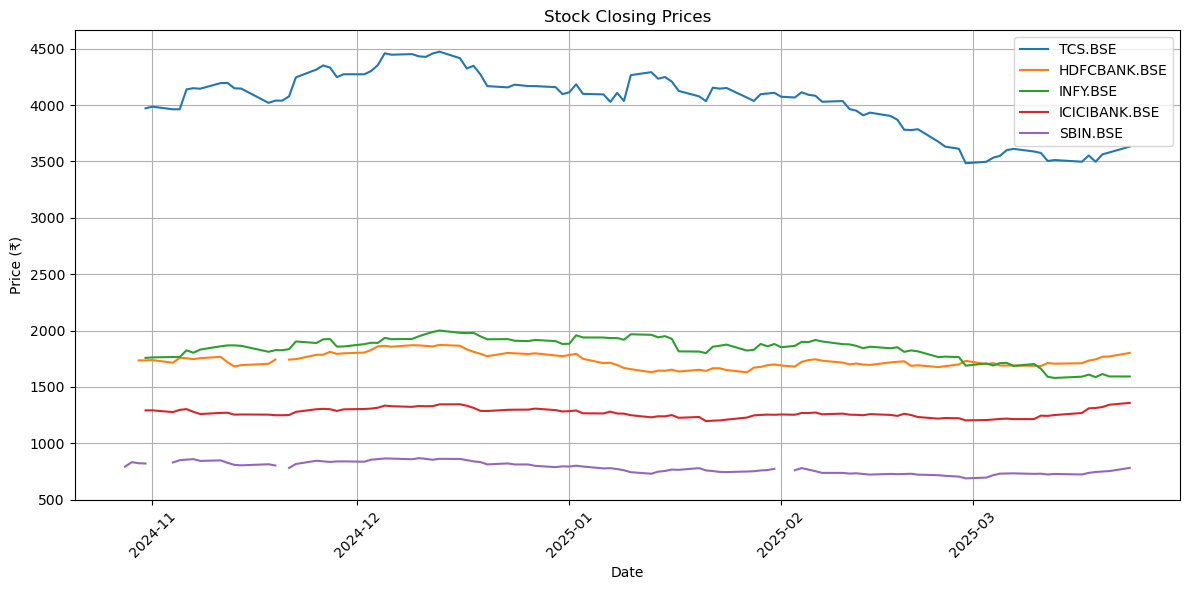


Stock Summary:
               Latest Price 1-Day Change % 7-Day Change %
TCS.BSE             3631.55          1.46%          3.39%
HDFCBANK.BSE        1801.15          1.77%          5.59%
INFY.BSE            1592.20         -0.03%          0.82%
ICICIBANK.BSE       1358.20          1.25%          8.63%
SBIN.BSE             781.40          3.77%          7.37%


In [2]:
# Simple stock data fetcher for beginners
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

# ----- Step 1: Set up your parameters -----
# List of stock symbols you want to fetch
symbols = [
    "TCS.BSE", 
    "HDFCBANK.BSE", 
    "INFY.BSE", 
    "ICICIBANK.BSE", 
    "SBIN.BSE"
]

# Your Alpha Vantage API key - replace with your actual key
api_key = "stock_api_key"

# ----- Step 2: Fetch data for each symbol -----
# Create an empty dictionary to store our results
all_data = {}

# Loop through each symbol and make API request
for symbol in symbols:
    print(f"Fetching data for {symbol}...")
    
    # API URL for this symbol
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=compact&apikey={api_key}"
    
    # Make the request
    response = requests.get(url)
    data = response.json()
    
    # Check if we got an error
    if "Error Message" in data:
        print(f"Error for {symbol}: {data['Error Message']}")
        continue
        
    # Store the data
    all_data[symbol] = data
    
    # Wait for 12 seconds to avoid hitting API limits
    time.sleep(12)  # Alpha Vantage free tier allows 5 requests per minute

# ----- Step 3: Extract the closing prices for each stock -----
closing_prices = {}

for symbol, data in all_data.items():
    # Check if we have time series data
    if "Time Series (Daily)" not in data:
        print(f"No time series data for {symbol}")
        continue
    
    # Get the time series data
    time_series = data["Time Series (Daily)"]
    
    # Extract just the closing prices
    prices = {}
    for date, values in time_series.items():
        prices[date] = float(values["4. close"])
    
    # Store in our dictionary
    closing_prices[symbol] = prices

# ----- Step 4: Create a pandas DataFrame -----
# Convert our dictionary to a more useful format
price_data = pd.DataFrame()

for symbol in closing_prices:
    # Create a series with the closing prices
    series = pd.Series(closing_prices[symbol])
    # Name the series after the symbol
    series.name = symbol
    
    # If this is our first symbol, use the series as the DataFrame
    if price_data.empty:
        price_data = pd.DataFrame(series)
    else:
        # Otherwise, join with the existing DataFrame
        price_data = price_data.join(series, how='outer')

# Convert the index to datetime and sort
price_data.index = pd.to_datetime(price_data.index)
price_data = price_data.sort_index()

# ----- Step 5: Display the data and create visualizations -----
# Show the most recent prices
print("\nMost Recent Closing Prices:")
print(price_data.tail())

# Create a simple price chart
plt.figure(figsize=(12, 6))

for symbol in price_data.columns:
    plt.plot(price_data.index, price_data[symbol], label=symbol)

plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ----- Step 6: Calculate some basic statistics -----
# Create a simple summary DataFrame
summary = pd.DataFrame(index=price_data.columns)

# Latest price
summary['Latest Price'] = price_data.iloc[-1]

# 1-day change
summary['1-Day Change %'] = (price_data.iloc[-1] / price_data.iloc[-2] - 1) * 100

# 7-day change (if we have enough data)
if len(price_data) >= 7:
    summary['7-Day Change %'] = (price_data.iloc[-1] / price_data.iloc[-7] - 1) * 100

# Format to 2 decimal places
for col in summary.columns:
    if 'Change' in col:
        summary[col] = summary[col].apply(lambda x: f"{x:.2f}%")

print("\nStock Summary:")
print(summary)